In [1]:
# Load the dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = r'C:\Users\Sharon\Desktop\Docs\Upskilled\HealthCare\data.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
# Check dataset structure and missing values
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [3]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates if any
data = data.drop_duplicates()

Number of duplicate rows: 0


In [4]:
# Summary statistics
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


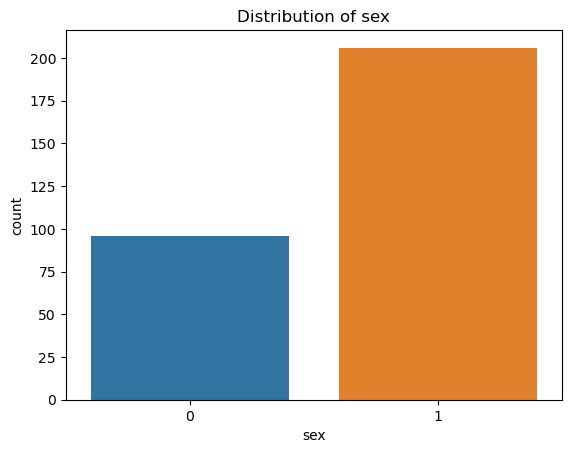

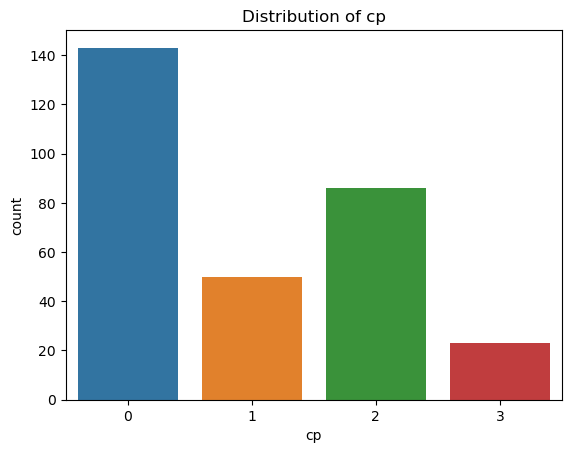

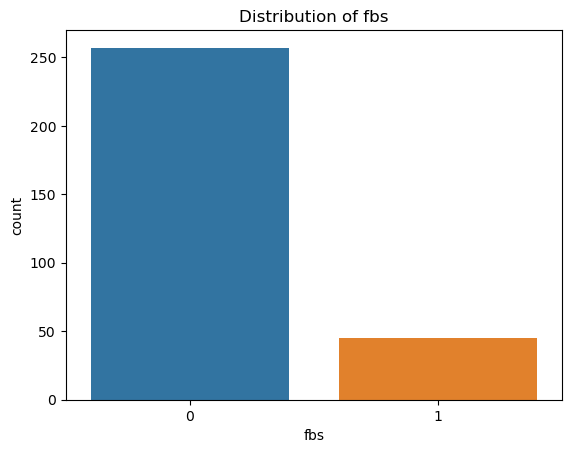

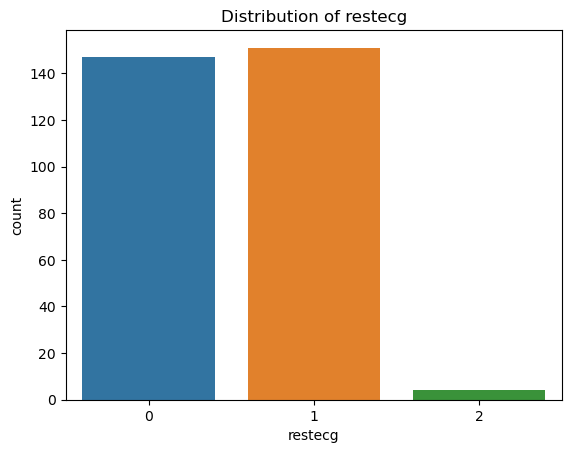

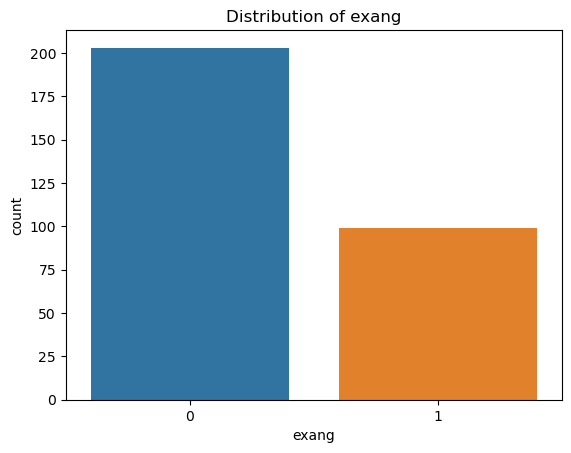

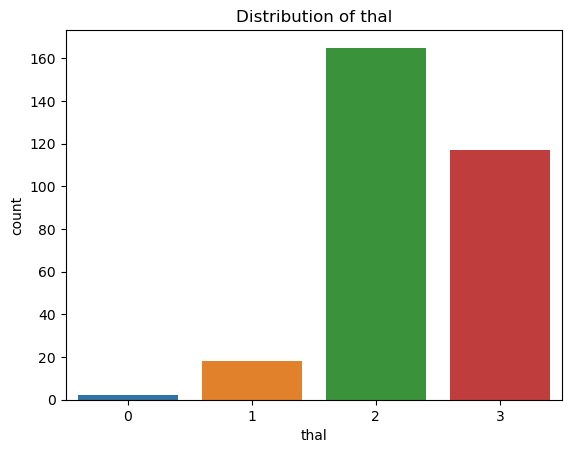

In [5]:
# Count plots for categorical variables
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'thal']
for col in categorical_cols:
    sns.countplot(data=data, x=col)
    plt.title(f"Distribution of {col}")
    plt.show()

C:\Users\Sharon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


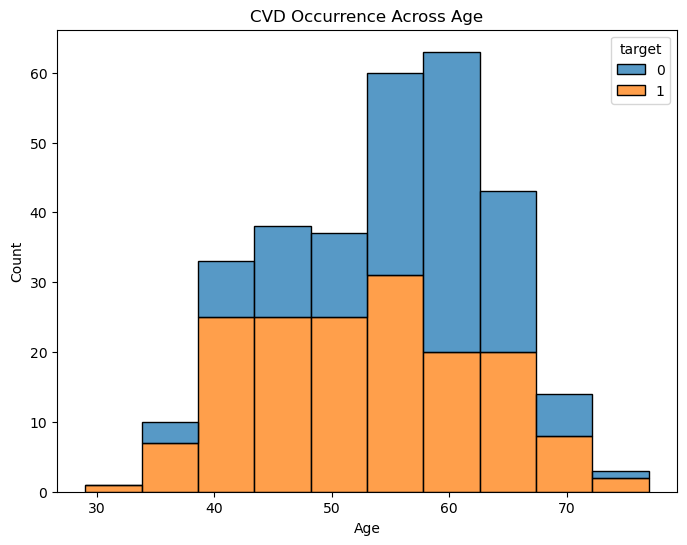

In [6]:
# Plot CVD occurrence by age
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='age', hue='target', multiple='stack', bins=10)
plt.title("CVD Occurrence Across Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

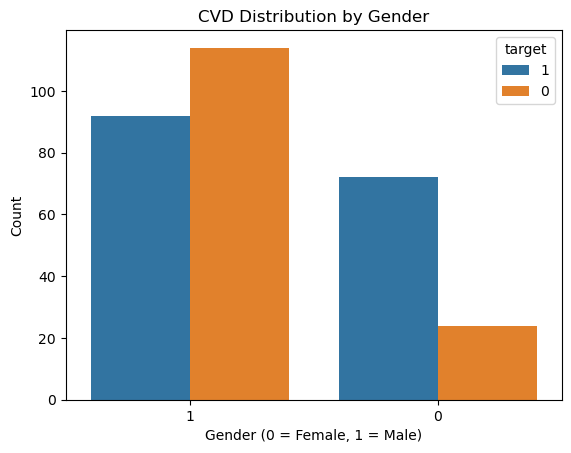

In [7]:
data['sex'] = data['sex'].astype(str)
data['target'] = data['target'].astype(str)

sns.countplot(data=data, x='sex', hue='target')
plt.title("CVD Distribution by Gender")
plt.xlabel("Gender (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.show()
import warnings
warnings.filterwarnings("ignore")

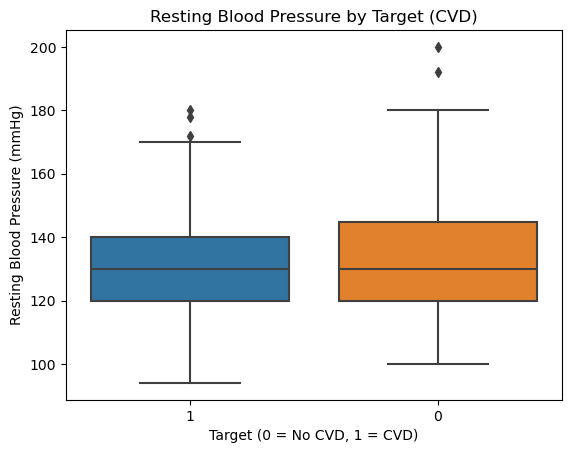

In [8]:
# Analyze resting blood pressure (trestbps) vs CVD
sns.boxplot(data=data, x='target', y='trestbps')
plt.title("Resting Blood Pressure by Target (CVD)")
plt.xlabel("Target (0 = No CVD, 1 = CVD)")
plt.ylabel("Resting Blood Pressure (mmHg)")
plt.show()

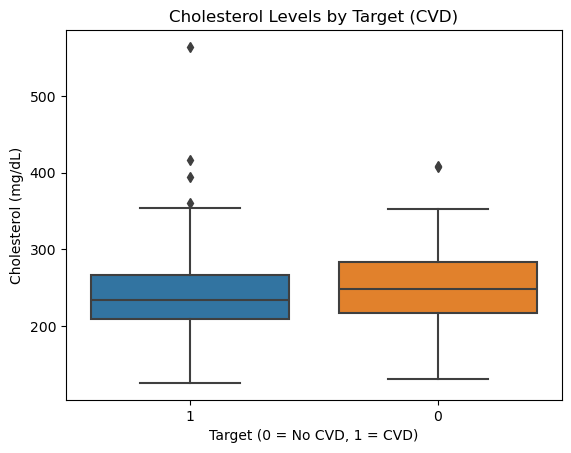

In [9]:
# Analyze cholesterol (chol) vs CVD
sns.boxplot(data=data, x='target', y='chol')
plt.title("Cholesterol Levels by Target (CVD)")
plt.xlabel("Target (0 = No CVD, 1 = CVD)")
plt.ylabel("Cholesterol (mg/dL)")
plt.show()

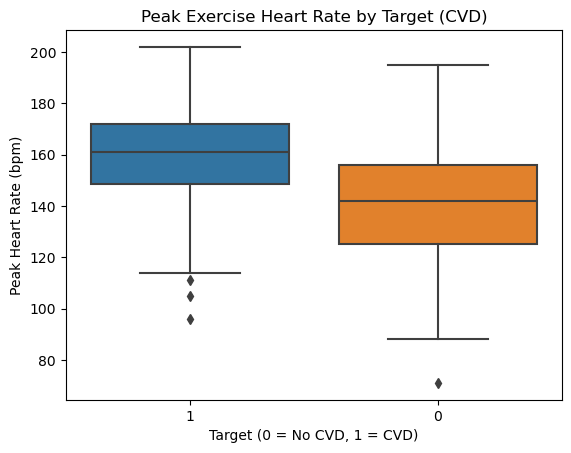

In [10]:
# Analyze peak exercise heart rate (thalach) vs CVD
sns.boxplot(data=data, x='target', y='thalach')
plt.title("Peak Exercise Heart Rate by Target (CVD)")
plt.xlabel("Target (0 = No CVD, 1 = CVD)")
plt.ylabel("Peak Heart Rate (bpm)")
plt.show()

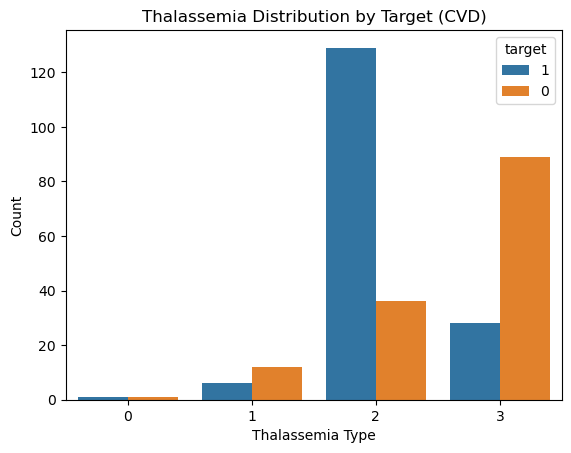

In [11]:
# Analyze thalassemia (thal) vs CVD
sns.countplot(data=data, x='thal', hue='target')
plt.title("Thalassemia Distribution by Target (CVD)")
plt.xlabel("Thalassemia Type")
plt.ylabel("Count")
plt.show()

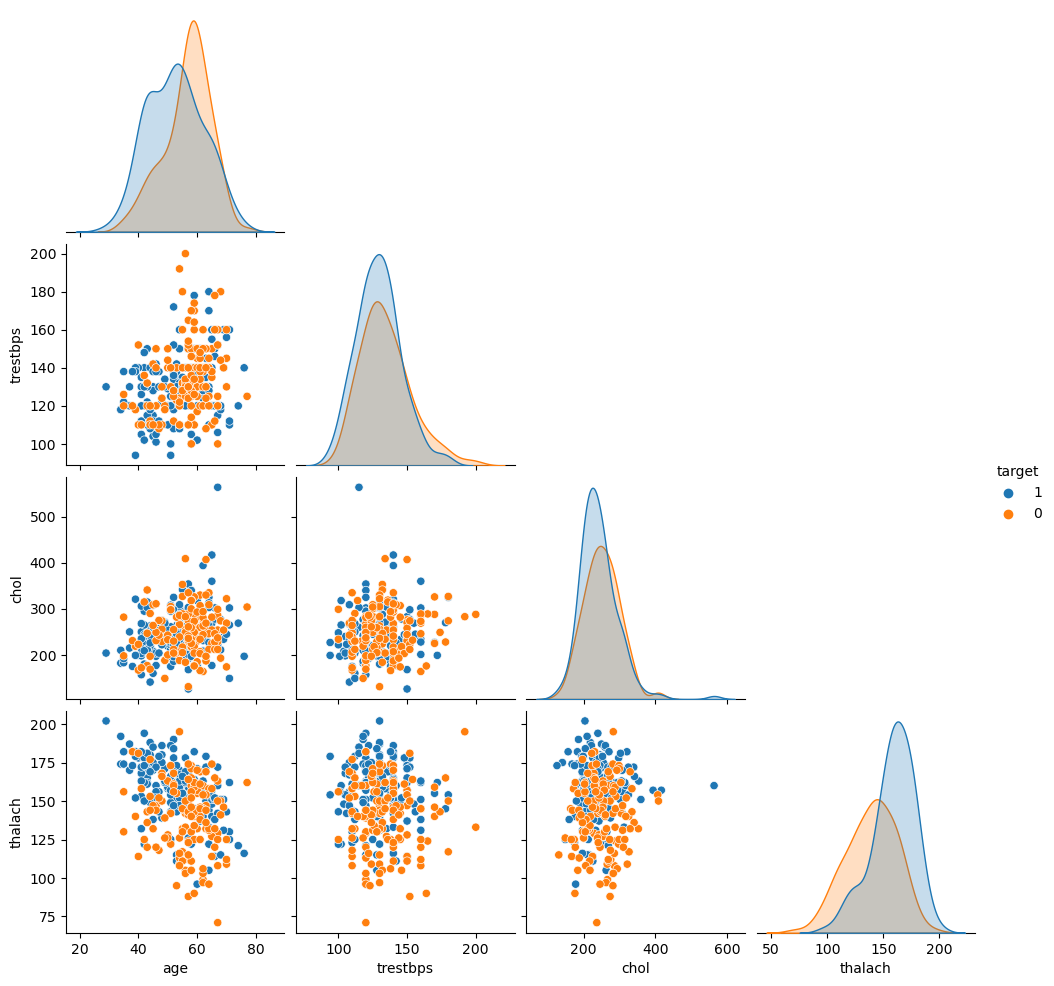

In [12]:
# Pair plot of selected variables
sns.pairplot(data[['age', 'trestbps', 'chol', 'thalach', 'target']], hue='target', diag_kind='kde', corner=True)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define predictors and target
X = data[['cp', 'thalach', 'slope', 'exang', 'oldpeak', 'ca']]  # Independent variables
y = data['target']  # Dependent variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("
Classification Report:")
print(classification_report(y_test, y_pred))
print("
Accuracy Score:", accuracy_score(y_test, y_pred))

SyntaxError: unterminated string literal (detected at line 22) (2094205208.py, line 22)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define predictors and target
X = data[['cp', 'thalach', 'slope', 'exang', 'oldpeak', 'ca']]  # Independent variables
y = data['target']  # Dependent variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")  # Add \n to start a new line
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[34  8]
 [ 9 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        42
           1       0.83      0.82      0.82        49

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91


Accuracy Score: 0.8131868131868132



Correlation with Target (CVD):
target      1.000000
cp          0.432080
thalach     0.419955
slope       0.343940
restecg     0.134874
fbs        -0.026826
chol       -0.081437
trestbps   -0.146269
age        -0.221476
sex        -0.283609
thal       -0.343101
ca         -0.408992
oldpeak    -0.429146
exang      -0.435601
Name: target, dtype: float64


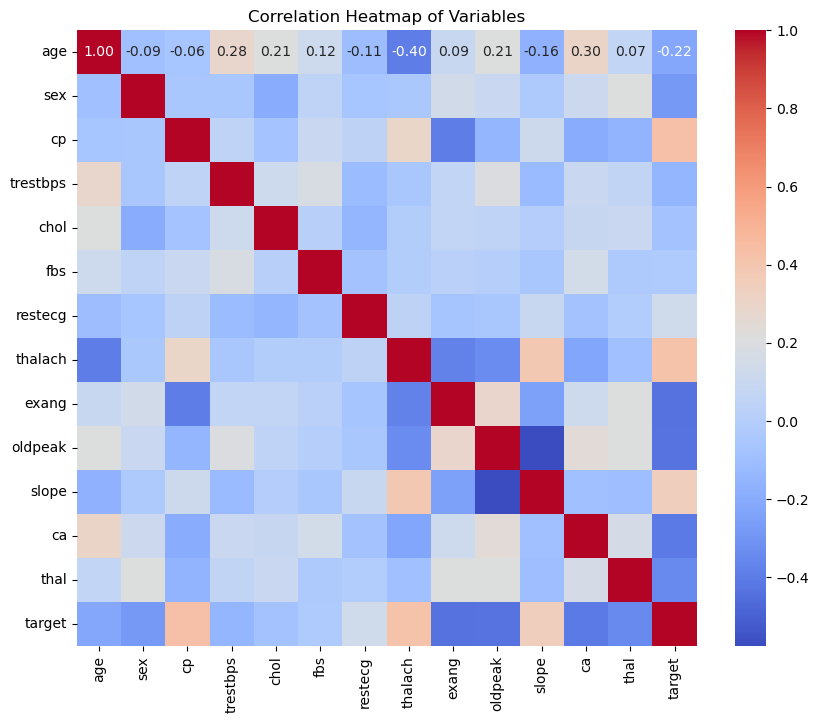

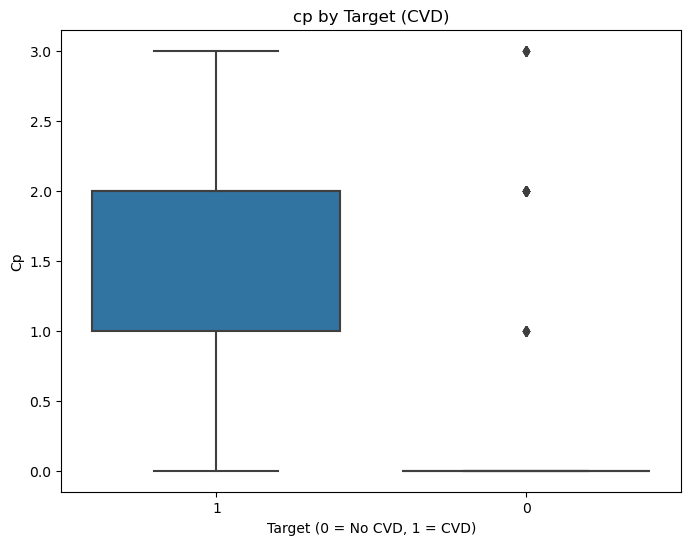

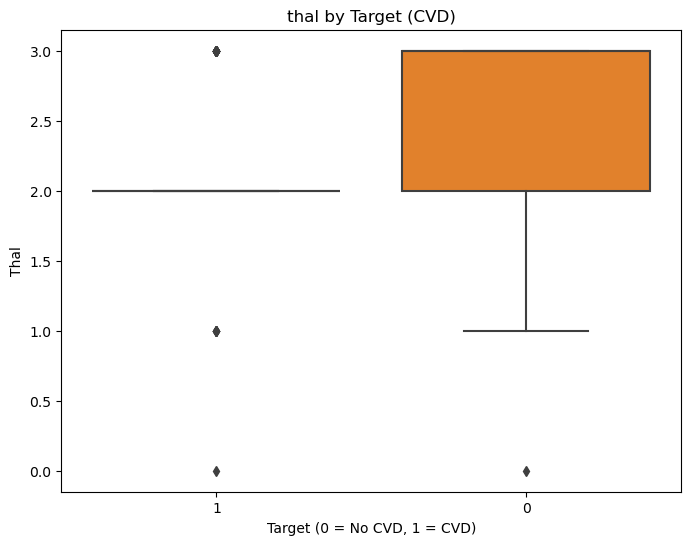

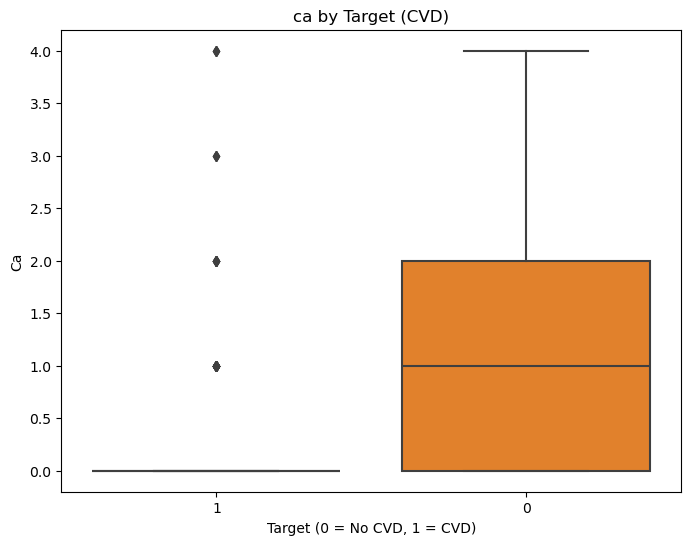

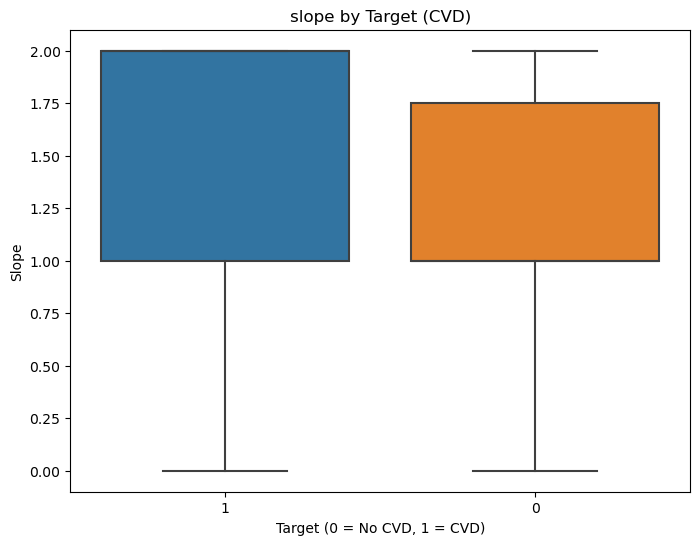

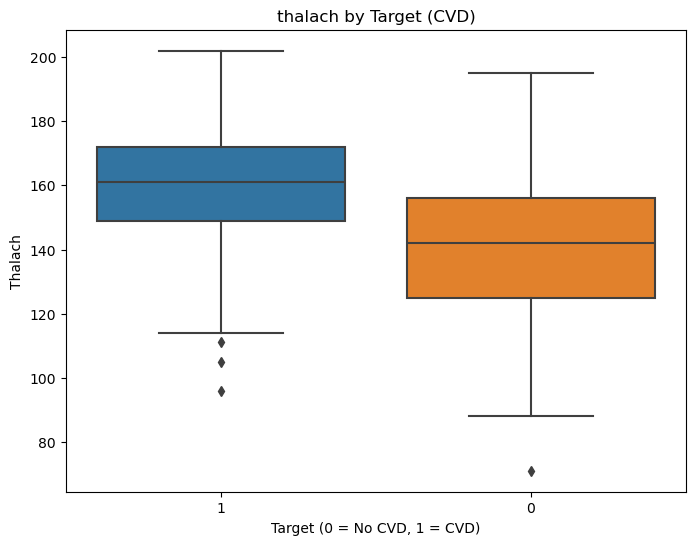

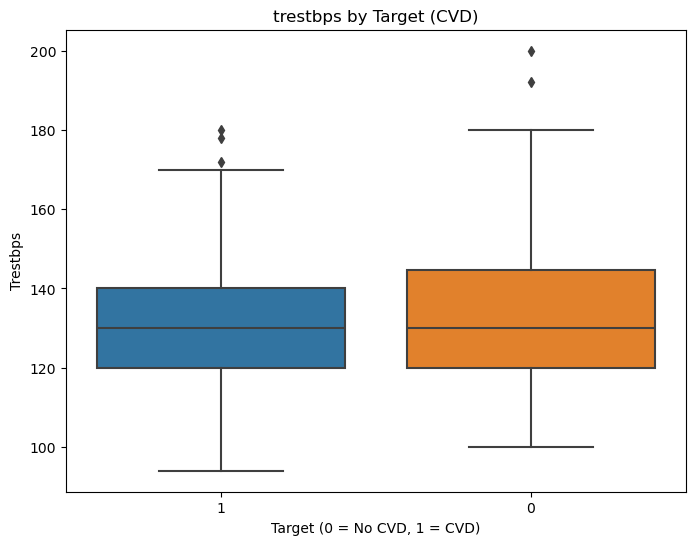

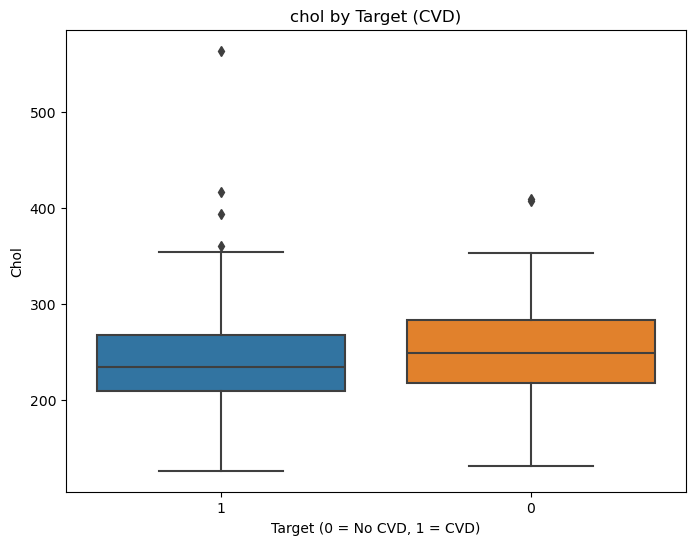

In [15]:
# ----------- Correlation Analysis -----------
correlation = data.corr()['target'].sort_values(ascending=False)
print("\nCorrelation with Target (CVD):")
print(correlation)

# ----------- Visualizing Correlations with a Heatmap -----------
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Variables")
plt.show()

# ----------- Box Plots for Key Factors -----------
key_factors = ['cp', 'thal', 'ca', 'slope', 'thalach', 'trestbps', 'chol']
for factor in key_factors:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, x='target', y=factor)
    plt.title(f"{factor} by Target (CVD)")
    plt.xlabel("Target (0 = No CVD, 1 = CVD)")
    plt.ylabel(factor.capitalize())
    plt.show()